[0.02214594 0.0436443  0.08480865 0.16049754 0.28982882 0.316602
 0.32688661 0.33228362 0.33504951 0.33644979 0.33715433 0.33750771
 0.33768468]


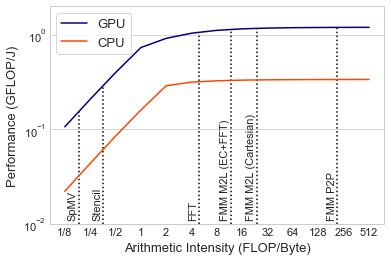

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
from math import log, ceil

fig, ax = plt.subplots()
# fig.set_size_inches(4, 3)
AI = [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512]
axes = plt.gca()
axes.set_ylim([1e-2,2e0])
ax.set_xscale('log')
ax.set_yscale('log')

# Fermi
# Tf = 1/(197.63*1e9); 
# Tm = 1/(192.4*1e9);
# Ef = 213 * 1e-12;
# Em = 513 * 1e-12;

Tf = 1/(197.63*1e9);
Tm = 1/(192.4*1e9);
Ef = 213 * 1e-12;
Em = 513 * 1e-12;

p0 = 122;
E0 = p0*Tf;
Bt = [Tm/Tf];
Be = Em/Ef;
Ef1 = Ef + E0;
eta = Ef/Ef1;
Be1 = eta * Be + (1-eta) * np.maximum(0,np.subtract(Bt,AI));
E = Ef1*(1+Be1/AI);
Emodel = 1/E/1e9;
line1, = ax.plot(AI, Emodel,label='GPU',color='navy') 

Tf = 1/(53.28*1e9);
Tm = 1/(25.6*1e9);
Ef = 670 * 1e-12;
Em = 795 * 1e-12;
p0 = 122;
E0 = p0*Tf;
Bt = [Tm/Tf];
Be = Em/Ef;
Ef1 = Ef + E0;
eta = Ef/Ef1;
Be1 = eta * Be + (1-eta) * np.maximum(0,np.subtract(Bt,AI));
E = Ef1*(1+Be1/AI);
Emodel = 1/E/1e9;
ax.plot(AI, Emodel,label='CPU',color='orangered') 

print Emodel
Tf = 1/(197.63*1e9);
Tm = 1/(192.4*1e9);
Ef = 212 * 1e-12;
Em = 513 * 1e-12;
p0 = 122;
E0 = p0*Tf;
Bt = [Tm/Tf];
Be = Em/Ef;
Ef1 = Ef + E0;
eta = Ef/Ef1;
Be1 = eta * Be + (1-eta) * np.maximum(0,np.subtract(Bt,AI));
E = Ef1*(1+Be1/AI);
Emodel = 1/E/1e9;

vline_min=1e-2;
y_min=0.011;
x_value=4.8773;
y_value = np.interp(x_value, AI, Emodel);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-1.2,y_min,'FFT',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=211.3476;
y_value = np.interp(x_value, AI, Emodel);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-50,y_min,'FMM P2P',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=23.5898;
y_value = np.interp(x_value, AI, Emodel);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-6,y_min,'FMM M2L (Cartesian)',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=11.8024;
y_value = np.interp(x_value, AI, Emodel);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-3,y_min,'FMM M2L (EC+FFT)',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=0.1849;
y_value = np.interp(x_value, AI, Emodel);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-0.05,y_min,'SpMV',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=0.3549;
y_value = np.interp(x_value, AI, Emodel);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-0.09,y_min,'Stencil',rotation=90, fontsize=11,verticalalignment='bottom')

sns.set_context(rc={"font.size":11})   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
ax.set_xticklabels(['1/8','1/4','1/2','1','2','4','8','16','32','64','128','256','512'], fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xticks(AI)                                                       
ax.set_ylabel('Performance (GFLOP/J)',size=13)
ax.set_xlabel('Arithmetic Intensity (FLOP/Byte)',size=13)

legend = plt.legend(fontsize=13,loc=2,frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
sns.set_style("whitegrid")
ax.xaxis.grid(False)
ax.yaxis.grid(True)

plt.show()
fig = ax.get_figure()
fig.savefig('rooflineE.pdf',bbox_inches='tight')